In [ ]:
#Solution to Problem 1

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
from operator import itemgetter

Problem1Data = loadmat(r"/home/karanvora/Documents/New York University/Classes/Semester 1/Machine Learning/Assignments/Assignment 1/problem1.mat")
X_Data = Problem1Data['x']
Y_Data = Problem1Data['y']
print(type(X_Data))
plt.scatter(X_Data, Y_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.5, random_state=5)

In [13]:
def Convert_Vector(X, Y, Dimension):
    X_Vector = X.tolist()
    for values in range(len(X_Vector)):
        X_Vector[values].insert(0,1)
        for Dim in range(2, Dimension + 1):
            X_Vector[values].append(pow(X_Vector[values][1], Dim))
    
    X_Vector = np.array(X_Vector)
    #X_Vector =X_Vector.T
    #print(X_Vector)
    Inverse = np.linalg.pinv(np.dot(X_Vector.T, X_Vector))
    Theta = np.dot(np.dot(Inverse, X_Vector.T), Y)
    #Hypothesis = np.dot(X_Vector, Theta)
    return X_Vector, Theta
# Convert_Vector(X_Train, Y_Train, 3)


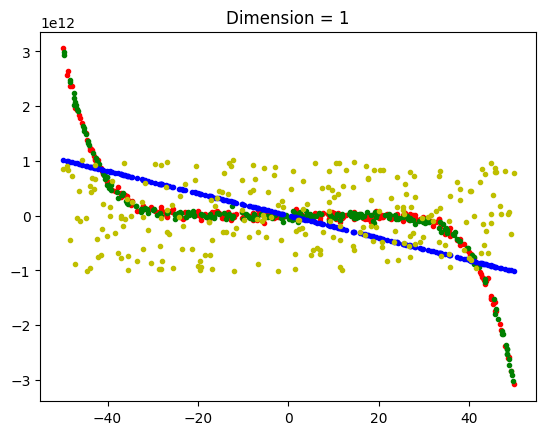

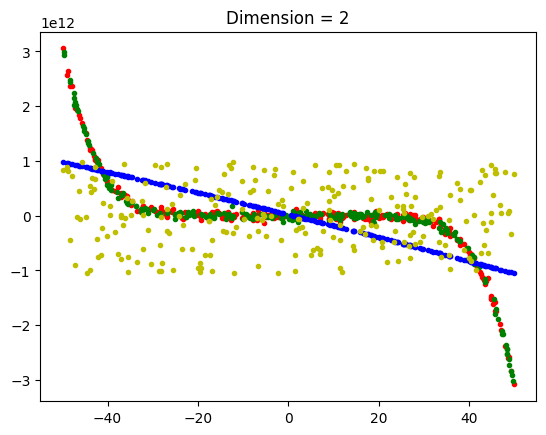

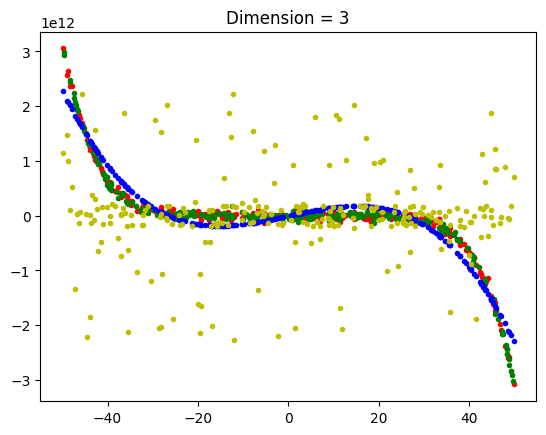

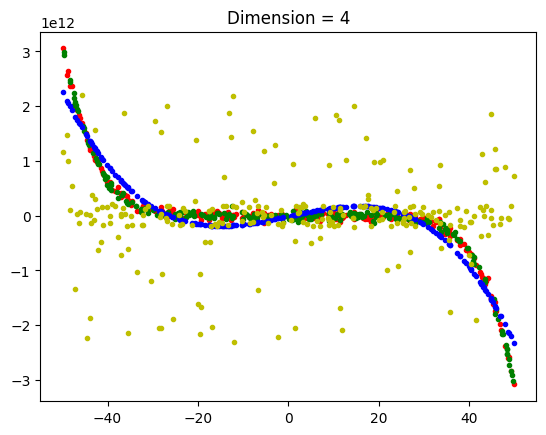

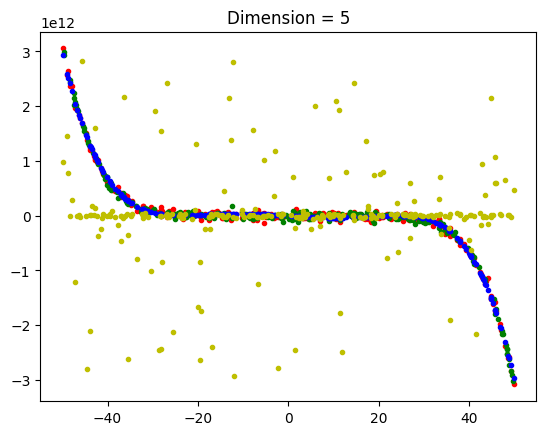

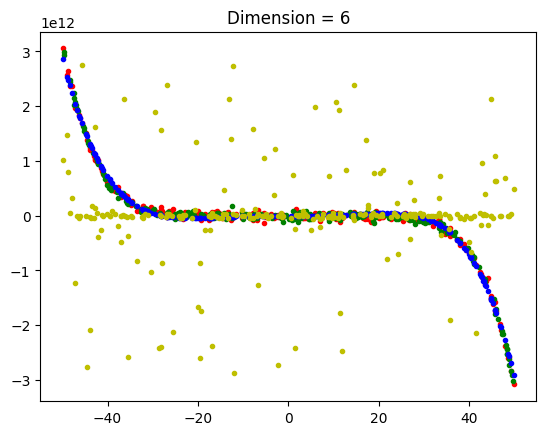

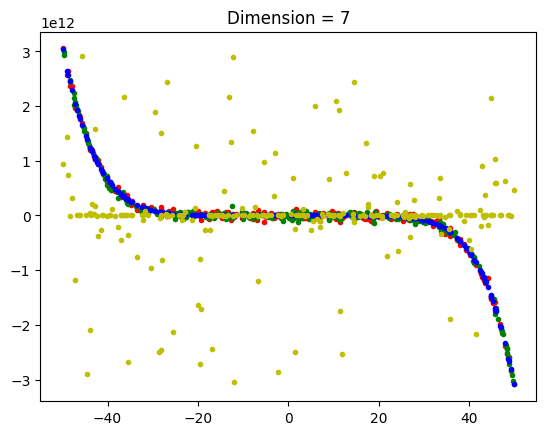

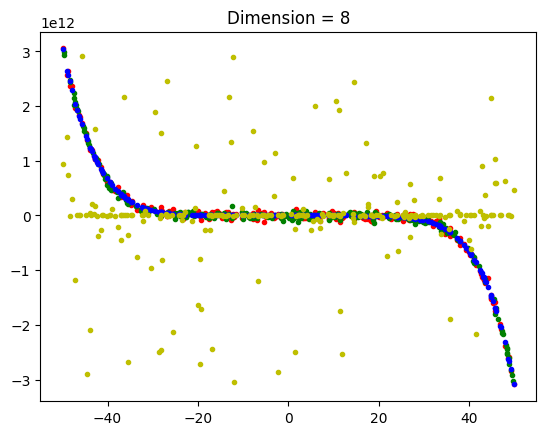

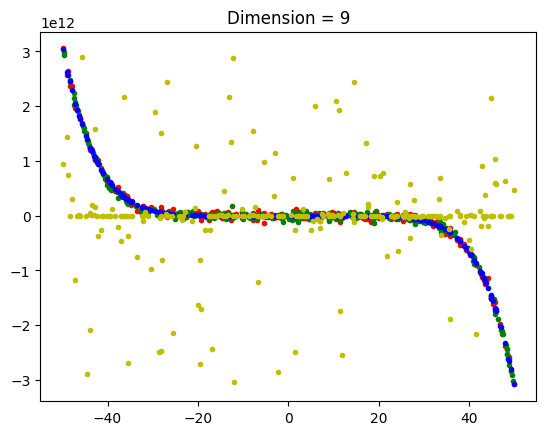

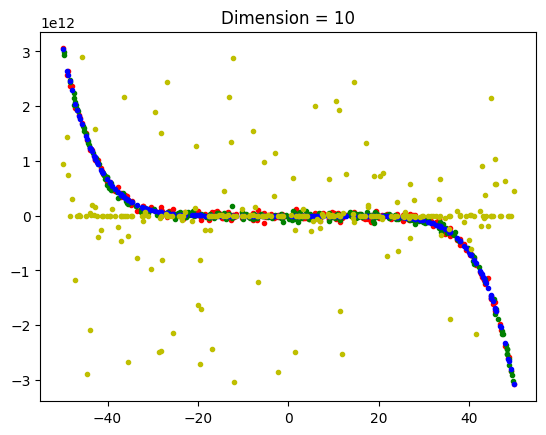

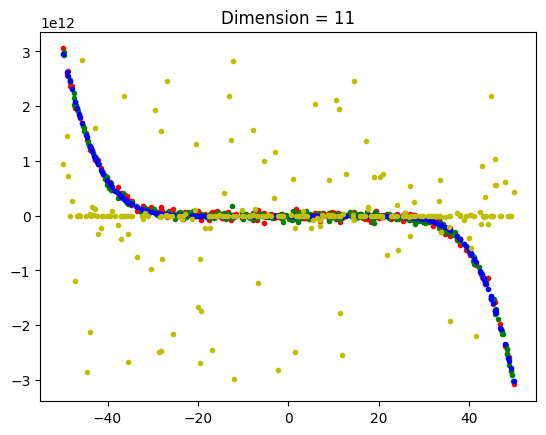

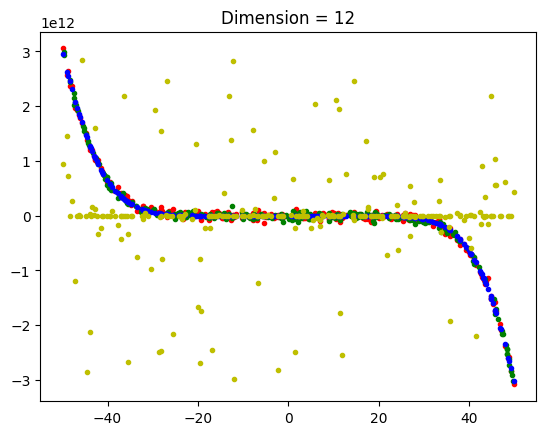

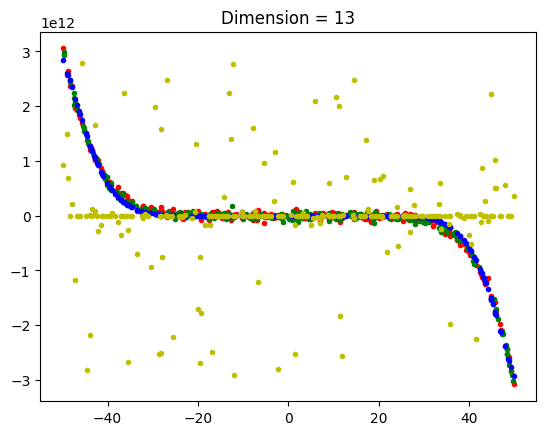

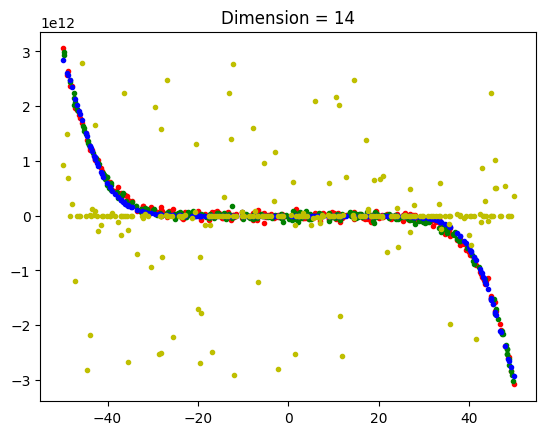

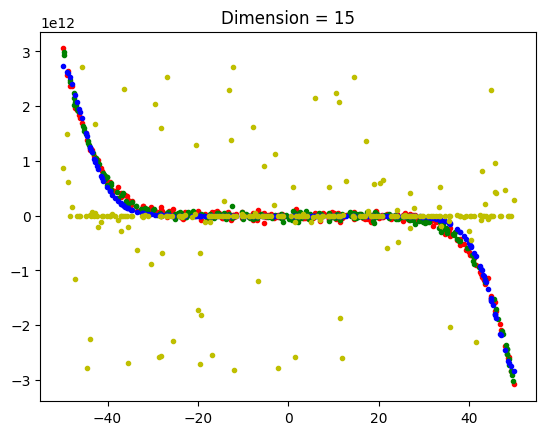

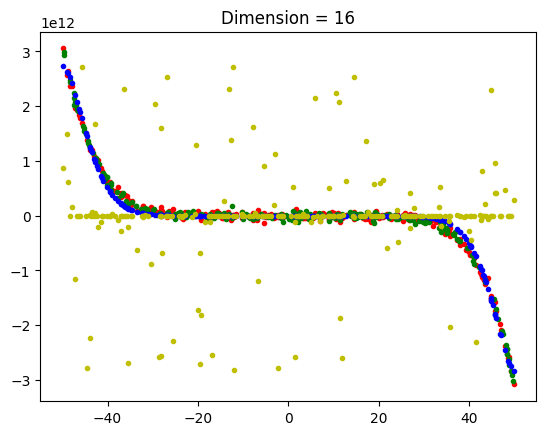

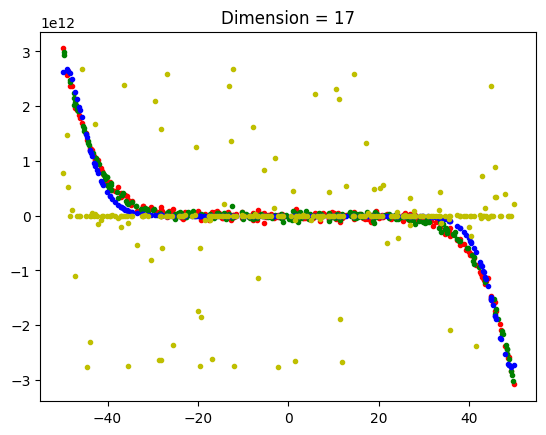

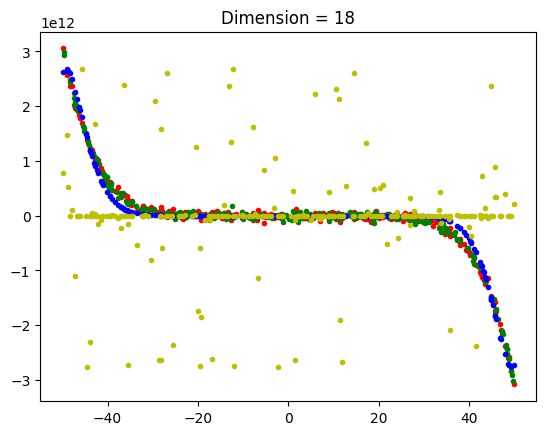

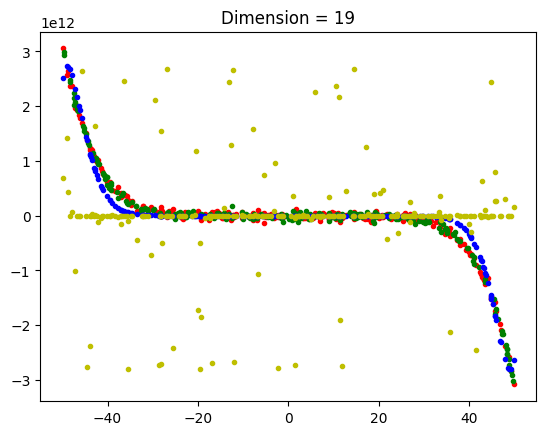

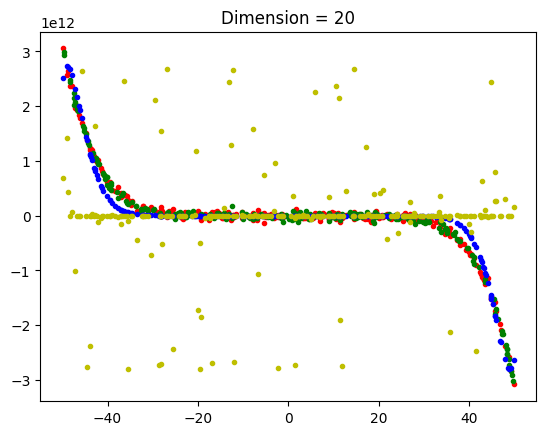

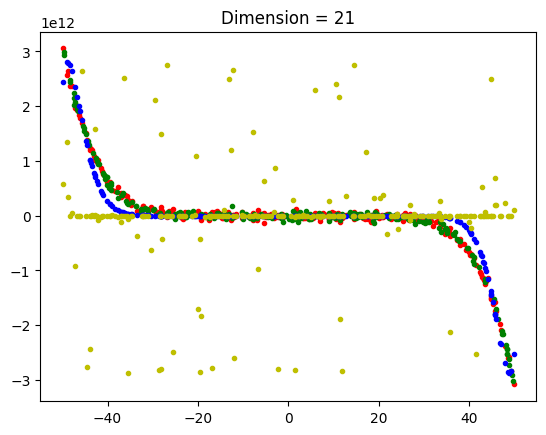

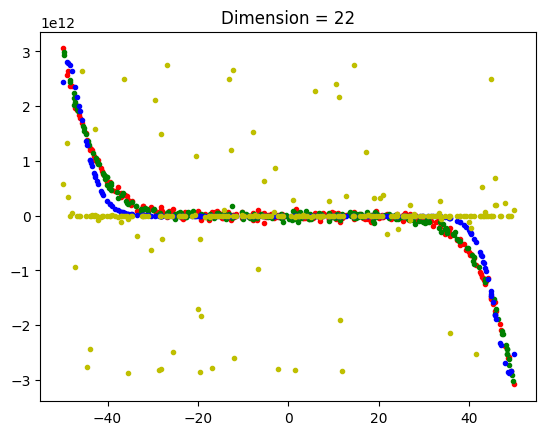

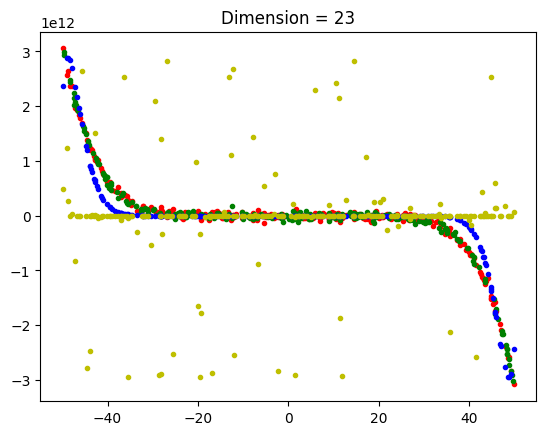

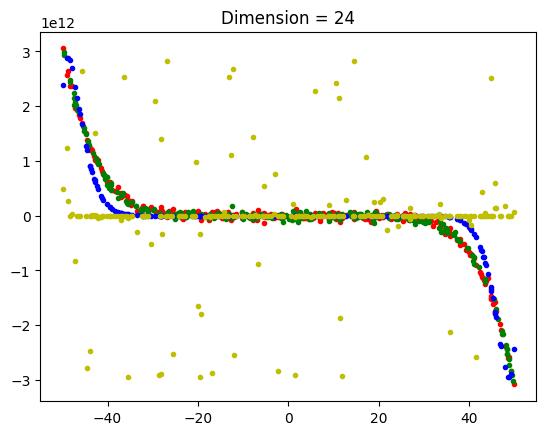

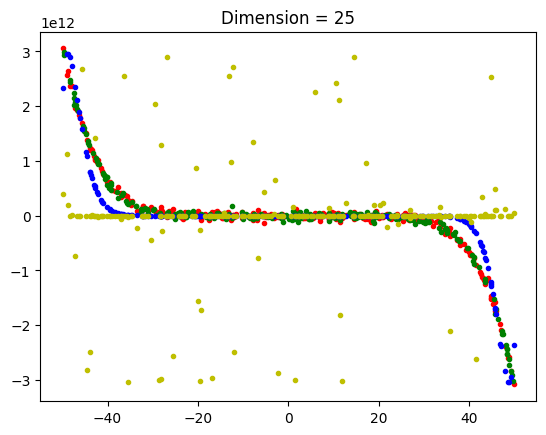

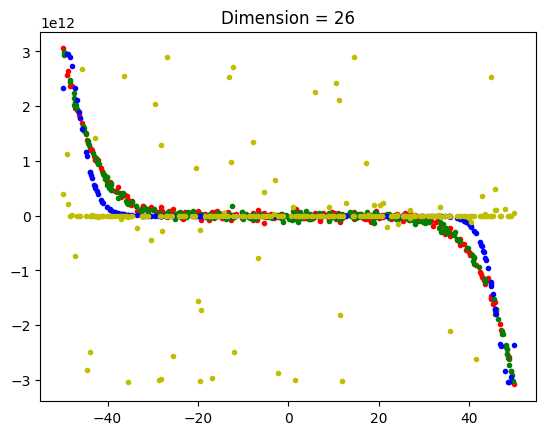

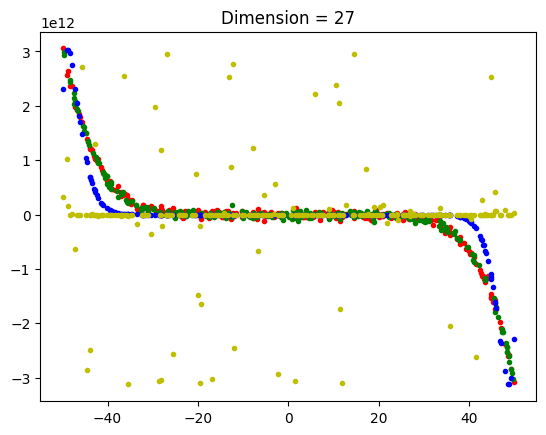

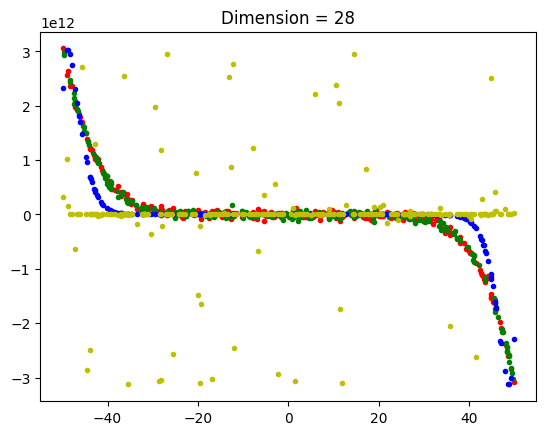

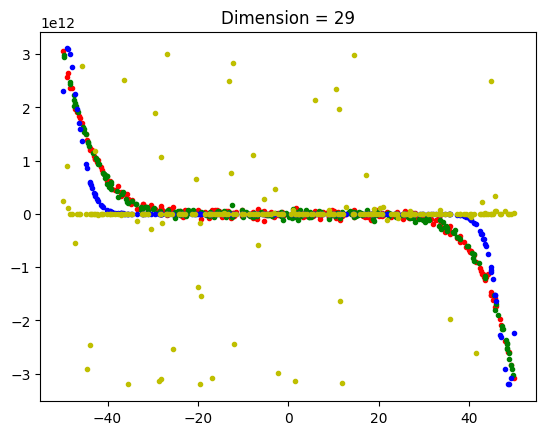

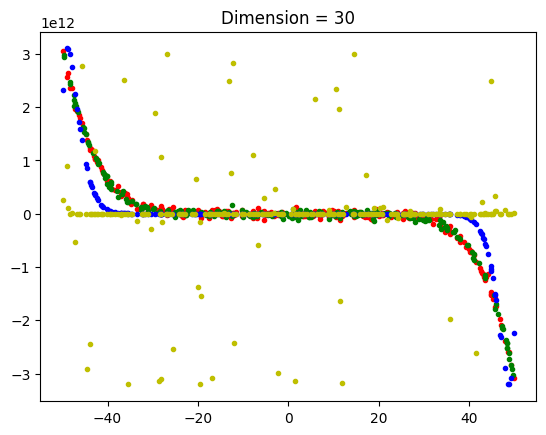

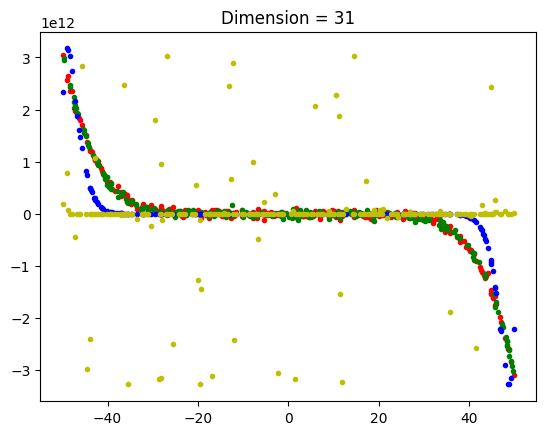

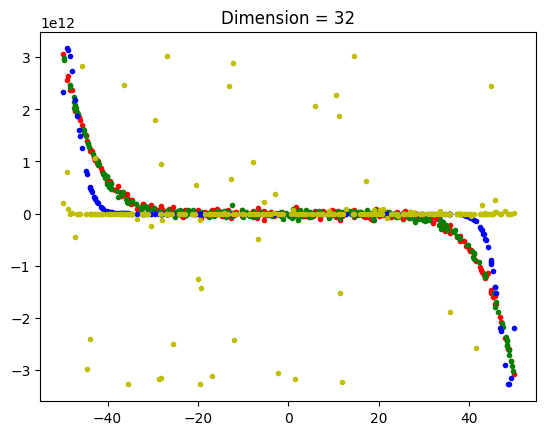

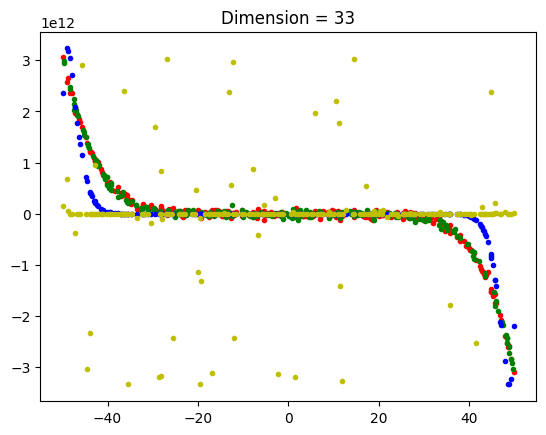

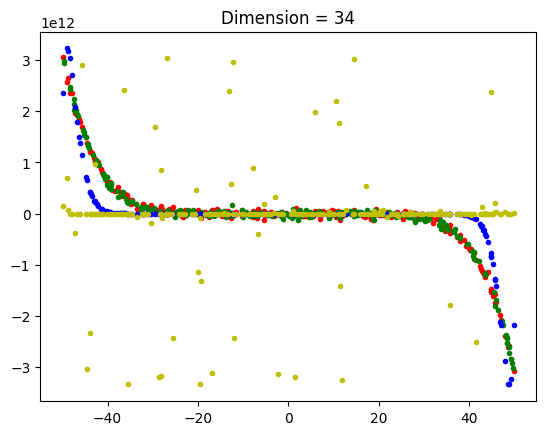

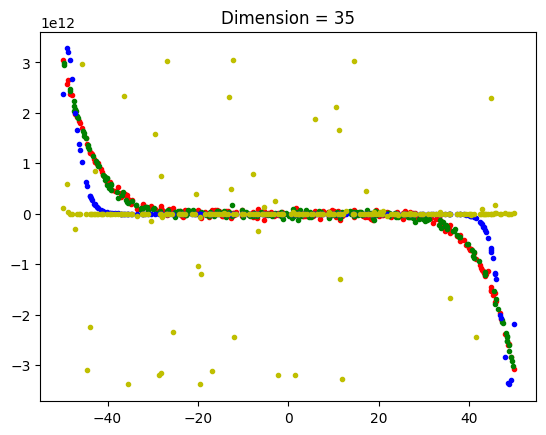

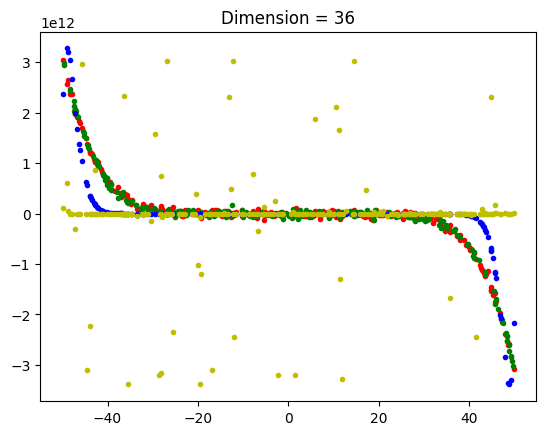

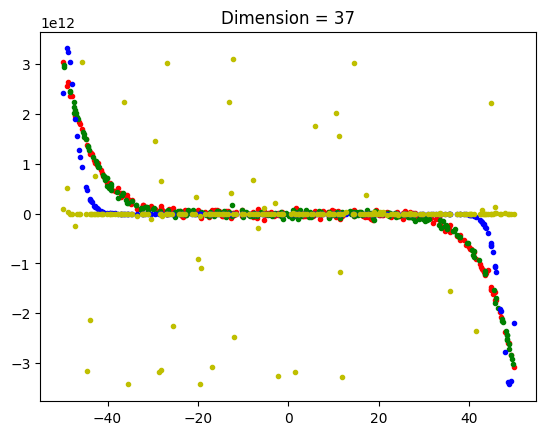

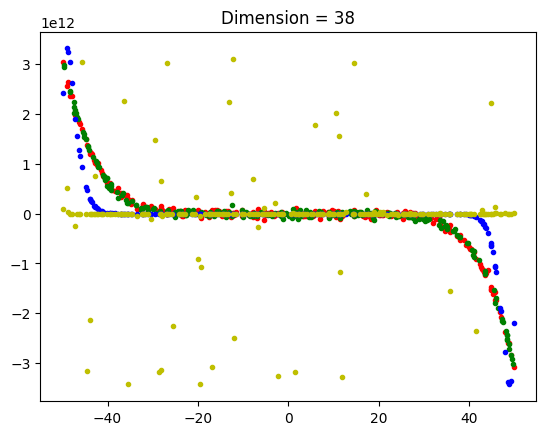

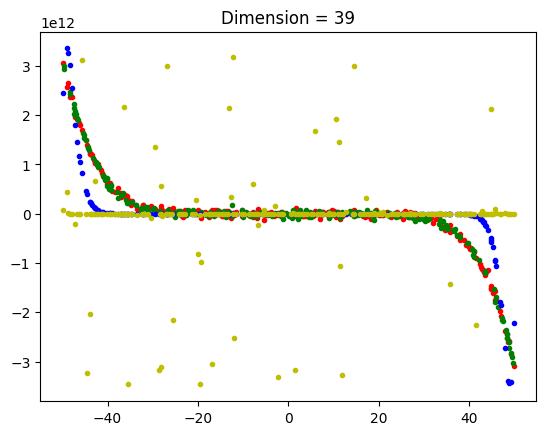

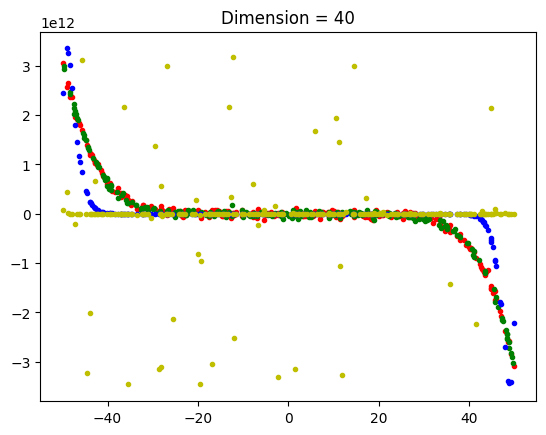

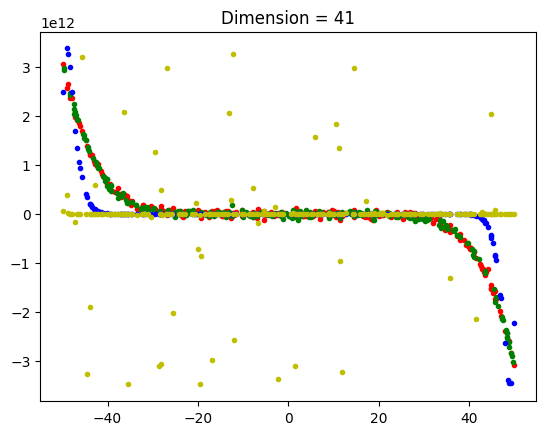

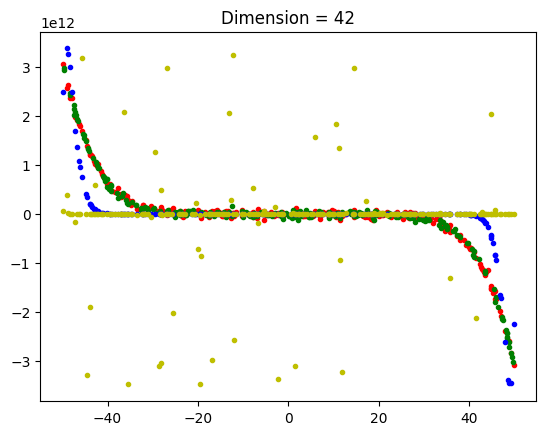

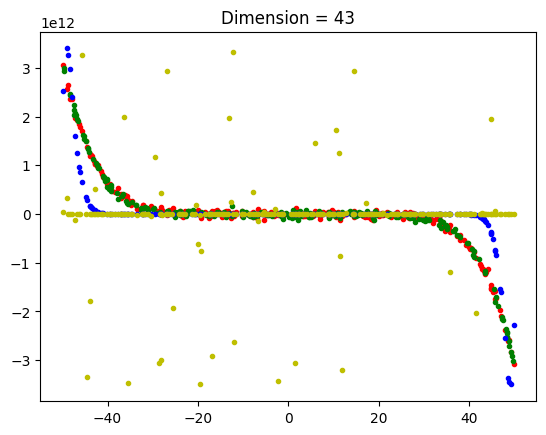

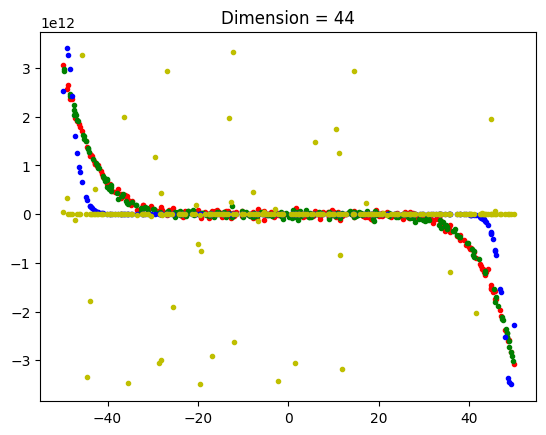

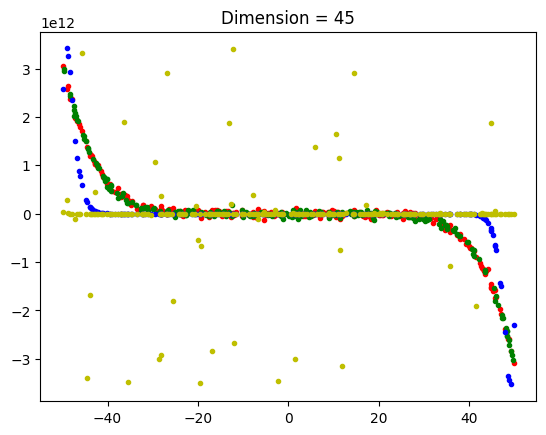

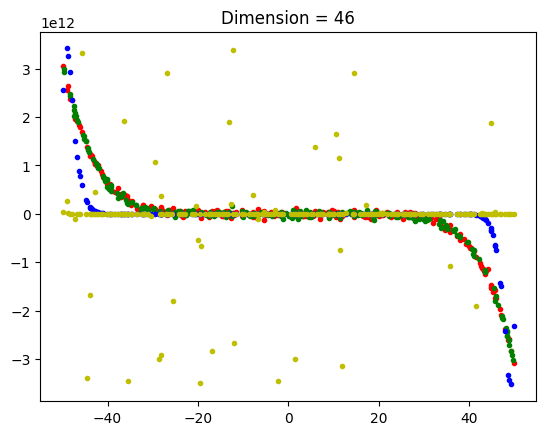

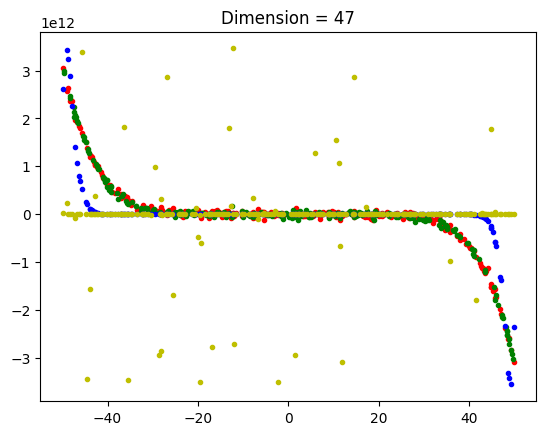

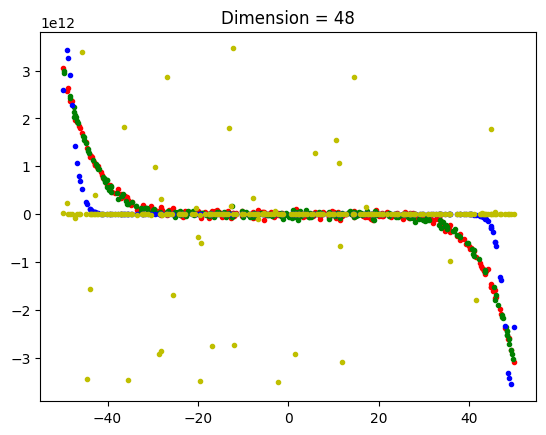

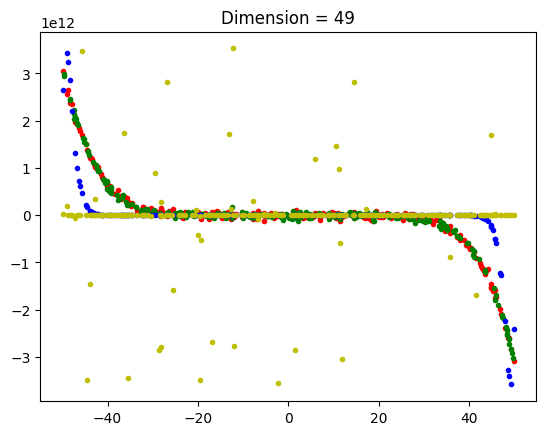

6


In [14]:
ValueList = []
MaxDim = 50
for Dim in range(1, MaxDim):
    ValueDir = {}
    ValueDir['Dimension'] = Dim
    
    X_Vector_Train, Theta1 = Convert_Vector(X_Train, Y_Train, Dim)
    Hypothesis1 = np.dot(X_Vector_Train, Theta1)
    TrainLoss = (1/(len(X_Train) * 2)) * np.sum(pow(Y_Train - Hypothesis1, 2))
    ValueDir['TrainLoss'] = TrainLoss
    ValueDir['TrainLossLog'] = math.log(TrainLoss)

    X_Vector_Test, Theta2 = Convert_Vector(X_Test, Y_Test, Dim)
    Hypothesis2 = np.dot(X_Vector_Test, Theta1)
    TestLoss = (1/(len(X_Test) * 2)) * np.sum(pow(Y_Test - Hypothesis2, 2))
    ValueDir['TestLoss'] = TestLoss
    ValueDir['TestLossLog'] = math.log(TestLoss)

    ValueDir['DifferenceOfLoss'] = math.log(abs(ValueDir['TestLoss'] - ValueDir['TrainLoss']))

    ValueList.append(ValueDir)
    # if Dim in (1,2,3,4,5,6,7,8,9,10,20,30,40):}
    plt.plot(X_Train, Y_Train, 'r.', label='Training Data')
    plt.plot(X_Test, Y_Test, 'g.', label='Testing Data')
    plt.plot(X_Train, Hypothesis1, 'b.', label='Training Prediction')
    plt.plot(X_Train, Hypothesis2, 'y.', label='Testing Prediction')
    plt.title('Dimension = {}'.format(str(Dim)))
    plt.show()

#print(json.dumps(ValueList, indent=3))

TrainLossSort = sorted(ValueList, key=itemgetter('TrainLossLog'))
LeastTrainLoss = TrainLossSort[0]['Dimension']
TestLossSort = sorted(ValueList, key=itemgetter('TestLossLog'))
LeastTestLoss = TestLossSort[0]['Dimension']
MinLossSort = sorted(ValueList, key=itemgetter('DifferenceOfLoss'))
DimensionOptimal = MinLossSort[0]['Dimension']
print(DimensionOptimal)

#print(LeastTrainLoss, LeastTrainLoss, DimensionOptimal)
#Now the Dimension we get is D-1, for optimal fit, we need to add 1 to the polynomial being fir
#DimensionOptimal = DimensionOptimal + 1

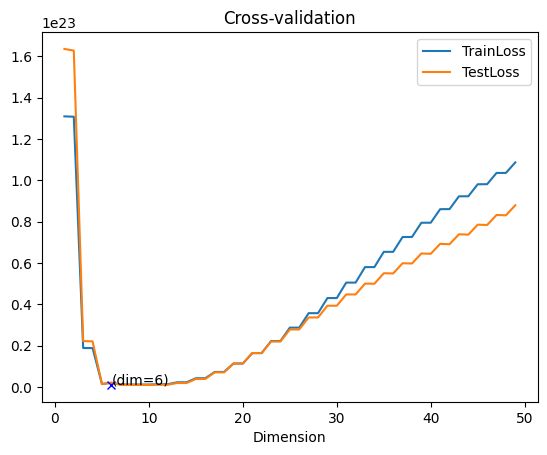

In [15]:
DataFrame = pd.DataFrame(ValueList)
DataFrame.plot('Dimension', ['TrainLoss', 'TestLoss'])
plt.plot(DimensionOptimal, ValueList[DimensionOptimal]['TrainLoss'], 'xb')
plt.text(DimensionOptimal, ValueList[DimensionOptimal]['TrainLoss'], "(dim={})".format(str(DimensionOptimal)))
plt.title('Cross-validation')
plt.show()

In [ ]:
# # Train_Loss = []
# # Test_Loss = []
# # Dimension = []
# Value_List = []
# max_dim = 50
# for Dim in range(1,max_dim):
#     Value_Dir = {}
#     Hypothesis = Convert_Vector(X_Train, Y_Train, Dim)
#     TrainLoss = (1/(len(X_Train)*2)) * np.sum(pow(Y_Train - Hypothesis, 2))
#     Value_Dir["TrainLoss"] = TrainLoss
#     Value_Dir["TrainLossLog"] = math.log(TrainLoss)
#     Hypothesis = Convert_Vector(X_Test, Y_Test, Dim)
#     TestLoss = (1/(len(X_Test)*2)) * np.sum(pow(Y_Test - Hypothesis, 2))
#     Value_Dir["TestLoss"] = TestLoss
#     Value_Dir["TestLossLog"] = math.log(TestLoss)
#     Value_Dir["Dimension"] = Dim
#     #Value_Dir["DifferenceOfLoss"] = abs(Value_Dir["TestLossLog"] - Value_Dir["TrainLossLog"])
#     Value_Dir["DifferenceOfLoss"] = math.log(abs(TrainLoss - TestLoss))
#     Value_List.append(Value_Dir)
#     break

# #print(json.dumps(Value_List, indent=3))

In [ ]:
# TrainLossLog = [math.log(val) for val in Train_Loss]
# print(TrainLossLog)
# print(min(TrainLossLog))
# TrainLossLog = np.array(TrainLossLog)
# print(np.argmin(TrainLossLog))

In [ ]:
# TestLossLog = [math.log(val) for val in Test_Loss]
# print(TestLossLog)
# print(min(TestLossLog))
# TestLossLog = np.array(TestLossLog)
# print(np.argmin(TestLossLog))

In [ ]:
# np.argmin(TrainLossLog + TestLossLog)

In [ ]:
# TrainLossSort = sorted(Value_List, key=itemgetter('TrainLossLog'))
# print(json.dumps(TrainLossSort, indent=3))

In [ ]:
# TestLossSort = sorted(Value_List, key=itemgetter('TestLossLog'))
# print(json.dumps(TestLossSort, indent=3))

In [ ]:
# MinLossSort = sorted(Value_List, key=itemgetter('DifferenceOfLoss'))
# print(json.dumps(MinLossSort, indent=3))
# DimensionOptimal = MinLossSort[0]['Dimension']
# #print(json.dumps(MinLossSort[0], indent=3))
# #rint(DimensionOptimal)

In [ ]:
# min_ind = np.argmin(TrainLossLog)
# plt.figure(0)
# ltrain, = plt.plot(range(1,max_dim), TrainLossLog,'b',label='train')
# ltest,  = plt.plot(range(1,max_dim), TestLossLog, 'r',label='test')
# plt.plot(min_ind, TestLossLog[min_ind], 'xr')
# plt.text(min_ind, TestLossLog[min_ind], "(dim={})".format(str(min_ind)))
# plt.xlabel('Dimension'); plt.ylabel('Error')
# plt.title('Cross-validation')
# plt.legend(handles=[ltrain, ltest])
# plt.show()